# Task 3.2
Development of a classification model for discriminating between 4 classes: masses and calcification. Usage of at least one pre-trained state-of-the-art architecture.

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
import os
from google.colab import drive
import numpy as np

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
drive.mount('/content/drive')
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['.config', 'drive', 'sample_data']

In [0]:
base_dir = 'drive/My Drive/Computational Intelligence - MY PROJECT/My_Project_CompInt' 
os.listdir(base_dir)

['OldNotebooks',
 'Task 1',
 'Models',
 'Task4_RelevantPapers',
 'Task 3.1_ INCEPTIONV3.ipynb',
 'Tensors',
 'Task2.1_With Data Aug.ipynb',
 'Task4.ipynb',
 'Task3.1_VGG16.ipynb',
 'Task5.ipynb',
 'Task3.2_VGG16.ipynb',
 'Task2.2.ipynb',
 'Task3.2_INCEPTION.ipynb']

In [0]:
#Restore the saved model
model = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task2.1_BaseVersion.h5'))

# Show the model architecture
model.summary()

# Getting the Data 

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images, train_labels, test_images, test_lable = load_training()




## Reshape

In [0]:
# reshape per poter fittare la CNN
train_images = train_images.reshape((5352, 150, 150,1))
train_images = train_images.astype('float32') / 65535

#adding channels
b = train_images
c = tf.concat([train_images, b], axis=3)
RGB_train_images_toResize = tf.concat([c, b], axis=3)
RGB_train_images = tf.image.resize(RGB_train_images_toResize, ( 299, 299))
print(RGB_train_images.shape)



test_images = test_images.reshape((672, 150, 150,1))
test_images = test_images.astype('float32') / 65535

#adding channels
b = test_images
c = tf.concat([test_images, b], axis=3)
RGB_test_images_toResize = tf.concat([c, b], axis=3)
RGB_test_images = tf.image.resize(RGB_test_images_toResize, ( 299, 299))
print(RGB_test_images[0])




In [0]:
print(RGB_test_images[1])
print(train_labels[0:100])

##DATASet manipulation
In order to perform binary classification some manipulations must be done 

In [0]:
print(RGB_train_images[0:2])

Tensor("strided_slice_3:0", shape=(2, 224, 224, 3), dtype=float32)


## Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray =  np.empty_like(RGB_train_images)
SubTrainArray =  np.delete(RGB_train_images, np.s_[::2], 0)

SubLabelArray = np.empty_like(train_labels)
SubLabelArray =  np.delete(train_labels, np.s_[::2], 0)


In [0]:
print(SubLabelArray[0:1000])
print(SubLabelArray[1000:2000])
print(SubTrainArray.shape)


## Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray)
SubLabelArray_Cat = np.empty_like(SubLabelArray)

for i in range(leng):
    if SubLabelArray[i] == 1:
      SubLabelArray_Cat[i] = 0
    if SubLabelArray[i] == 2:
      SubLabelArray_Cat[i] = 1
    if SubLabelArray[i] == 3:
      SubLabelArray_Cat[i] = 2
    if SubLabelArray[i] == 4:
      SubLabelArray_Cat[i] = 3

print(SubLabelArray_Cat[0:1000])
print(SubLabelArray_Cat[2000:])


## Modifiyng the test set

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray =  np.empty_like(RGB_test_images)
SubTestArray =  np.delete(RGB_test_images, np.s_[::2], 0)

SubTestLabelArray = np.empty_like(test_lable)
SubTestLabelArray =  np.delete(test_lable, np.s_[::2], 0)
print(SubTestLabelArray[0:1000])
print(SubTestArray.shape)

[2 2 2 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1
 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 1 1 2 2 2 2 1 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 2 2 1 2 1
 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 2 2 1 2 2 1 1 1 1 2 2 1 1 1 1 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 4 3 3 4 3 3 3 3 4 4 3 3 3 3
 3 3 4 3 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 3 3 4 4 3 3 4 4 4 4 4 4
 4 3 3 3 3 4 4 4 3 3 3 3 3 3 4 3 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 4 4 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 3 3 4 4 4 4 4 4 3 3 4 4 4 4 4 4 4 3 3 3 3 3 3 3
 3 3 3]
(336, 299, 299, 3)


### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited = np.zeros_like(SubTestLabelArray)

leng = len(SubTestLabelArray)
for i in range(leng):
    if SubTestLabelArray[i] == 1:
      SubTestLabelArray_Edited[i] = 0
    if SubTestLabelArray[i] == 2:
      SubTestLabelArray_Edited[i] = 1
    if SubTestLabelArray[i] == 3:
      SubTestLabelArray_Edited[i] = 2
    if SubTestLabelArray[i] == 4:
      SubTestLabelArray_Edited[i] = 3

print(SubTestLabelArray_Edited[0:1000])


## To Categorical for both test and train

In [0]:

from keras.utils import to_categorical

SubTestLabelArray_Categorical = to_categorical(SubTestLabelArray_Edited,4)#test
SubTrainLabelArray_Categorical = to_categorical(SubLabelArray_Cat,4)#train
print(SubTrainLabelArray_Categorical)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Using TensorFlow backend.


## Shuffle for Train Data

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled, SubLabelArray_Shuffled = shuffle( SubTrainArray, SubTrainLabelArray_Categorical, random_state=42)



In [0]:
#Printing in order to check if the shuffled has been performed well
print(SubLabelArray_Shuffled[0:1000])
print(SubLabelArray_Shuffled[2000:3000])


# First Version: Using INCEPTION 16 without Data Augmentation

## Importing INCEPTION


In [0]:
from tensorflow.keras.applications import inception_v3

conv_inception = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None,  input_shape=(299, 299, 3), )


In [0]:
conv_inception.summary()

## Freezing the INCEPTION layers


In [0]:
conv_inception.trainable = False

## Training my layers with INCEPTION freezed


#### Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()

model.add(conv_inception)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))



In [0]:
model.summary()#a summary of the architecture

In [0]:

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=6)

### Guardo quanti layer sono effettivamente trainabili.
 Avendo congelato la rete VGG16, solo i miei layer aggiunti sono trainabili. 

In [0]:
print('This is the number of trainable weights ', len(model.trainable_weights))

This is the number of trainable weights  6


### 10 - CrossValidation
10 has been choosen following the paper "Deep Learning for Breast Cancer Diagnosis from
Mammograms—A Comparative Study"

In [0]:
#cross-validation, SUL TRAINING ESTRATTO e shuffled
import numpy as np
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

def get_model():
  Cross_model_DropOut = models.Sequential()

  Cross_model_DropOut.add(conv_inception)
  Cross_model_DropOut.add(layers.Flatten())
  Cross_model_DropOut.add(layers.Dense(512, activation='relu'))
  Cross_model_DropOut.add(layers.Dense(256, activation='relu'))
  Cross_model_DropOut.add(layers.Dense(4, activation='softmax'))
  return Cross_model_DropOut

def plot():
  acc = history.history['categorical_accuracy']
  val_acc = history.history['val_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()
  return



k = 10
num_val_samples = len(SubTrainArray_Shuffled) // k
num_epochs = 50
Cross_model_DropOut = get_model()
Cross_model_DropOut.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print('This is the number of trainable weights ', len(Cross_model_DropOut.trainable_weights))
for i in range(k):
  print('processing fold #', i)
  
  val_data = SubTrainArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = SubLabelArray_Shuffled[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([SubTrainArray_Shuffled[:i * num_val_samples],SubTrainArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate([SubLabelArray_Shuffled[:i * num_val_samples],SubLabelArray_Shuffled[(i + 1) * num_val_samples:]],axis=0)
  history = Cross_model_DropOut.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=32)
  Cross_model_DropOut = get_model()
  Cross_model_DropOut.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy'])
  plot()



This is the number of trainable weights  6
processing fold # 0
Train on 2409 samples, validate on 267 samples
Epoch 1/50
2409/2409 [==============================] - 11s 5ms/sample - loss: 9.7410 - categorical_accuracy: 0.4081 - val_loss: 1.7449 - val_categorical_accuracy: 0.3483
Epoch 2/50
2409/2409 [==============================] - 8s 3ms/sample - loss: 1.3037 - categorical_accuracy: 0.5994 - val_loss: 1.8015 - val_categorical_accuracy: 0.4532
Epoch 3/50
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.9676 - categorical_accuracy: 0.6721 - val_loss: 1.7293 - val_categorical_accuracy: 0.3184
Epoch 4/50
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.6383 - categorical_accuracy: 0.7630 - val_loss: 2.0039 - val_categorical_accuracy: 0.4345
Epoch 5/50
2409/2409 [==============================] - 8s 3ms/sample - loss: 0.5717 - categorical_accuracy: 0.7945 - val_loss: 2.2994 - val_categorical_accuracy: 0.3820
Epoch 6/50
2409/2409 [=================

KeyboardInterrupt: ignored

### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=50,callbacks=[callback], batch_size=32)


Train on 2676 samples
Epoch 1/50
2676/2676 [==============================] - 11s 4ms/sample - loss: 17.6495 - categorical_accuracy: 0.3546
Epoch 2/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 1.8592 - categorical_accuracy: 0.4144
Epoch 3/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 1.7273 - categorical_accuracy: 0.4585
Epoch 4/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 1.3165 - categorical_accuracy: 0.4978
Epoch 5/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 1.0913 - categorical_accuracy: 0.5534
Epoch 6/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 0.9936 - categorical_accuracy: 0.6031
Epoch 7/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 0.9753 - categorical_accuracy: 0.6170
Epoch 8/50
2676/2676 [==============================] - 8s 3ms/sample - loss: 0.9222 - categorical_accuracy: 0.6304
Epoch 9/50
2676/2676 [==========================

KeyboardInterrupt: ignored

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model.evaluate(SubTestArray, SubTestLabelArray_Categorical, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 2s 6ms/sample - loss: 2.2072 - categorical_accuracy: 0.3839
2.207230976649693
0.38392857


### Plotting

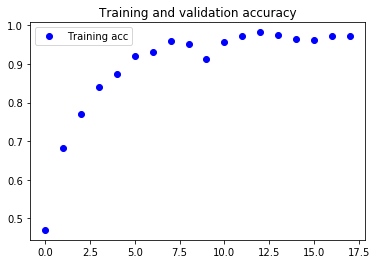

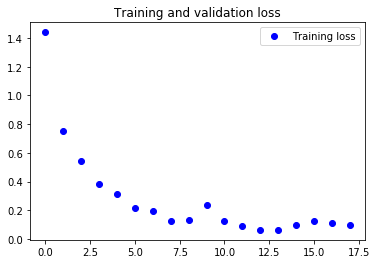

In [0]:
import matplotlib.pyplot as plt
acc = history.history['categorical_accuracy']
#val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
#plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## FINE-TUNING: unfreezing INCEPTION bottom layers
Considered that the new dataset is small and different from the previous it is not appropriate to finetuning. Neverthless in some paper, as "Deep Learning for Breast Cancer Diagnosis from
Mammograms—A Comparative Study" fine-tuning has been used obtaining good results

Decido quali layer rendere trainabili

In [0]:
conv_inception.trainable = True

set_trainable = False
for layer in conv_inception.layers:
    if layer.name == 'mixed8':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in conv_inception.layers:
    if layer.trainable == True :
        print(layer.name)


Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model.trainable_weights))

This is the number of trainable weights  42


### Re-compile the model with a low LR

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)


### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
 history = model.fit(SubTrainArray_Shuffled, SubLabelArray_Shuffled, epochs=30,callbacks=[callback], batch_size=32)


2144/2676 [=======================>......] - ETA: 1s - loss: 0.0297 - categorical_accuracy: 0.9910

KeyboardInterrupt: ignored

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model.evaluate(SubTestArray, SubTestLabelArray_Categorical, verbose= 1)
print(test_loss)
print(test_acc)

336/336 [==============================] - 2s 6ms/sample - loss: 5.5697 - categorical_accuracy: 0.4196
5.569705304645357
0.41964287


# INCEPTION with augmentation: Same steps but Adding Data Augmentation

## Importing INCEPTION


In [0]:
from tensorflow.keras.applications import inception_v3

conv_inception = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None,  input_shape=(299, 299, 3), )


In [0]:
conv_inception.summary()

## Freezing the INCEPTION layers


In [0]:
conv_inception.trainable = False

## Define the model

In [0]:
keras.layers.Conv2D?
keras.layers.MaxPooling2D?
from tensorflow.keras import layers
from tensorflow.keras import models

model_Augmented = models.Sequential()

model_Augmented.add(conv_inception)
model_Augmented.add(layers.Flatten())
model_Augmented.add(layers.Dense(512, activation='relu'))
model_Augmented.add(layers.Dense(256, activation='relu'))
model_Augmented.add(layers.Dense(4, activation='softmax'))



In [0]:
model_Augmented.summary()#a summary of the architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 8, 8, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               33554688  
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 55,358,500
Trainable params: 33,555,716
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:

model_Augmented.compile(optimizer=keras.optimizers.Adam(lr= 2e-5),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])


In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=5)

## Guardo quanti layer sono effettivamente trainabili.
 Avendo congelato la rete VGG16, solo i miei layer aggiunti sono trainabili. 

In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  6


## Modifying of the dataset

In [0]:
from tensorflow.keras.utils import to_categorical
def load_training():
  train_images = np.load(os.path.join(base_dir,'Tensors/train_tensor.npy'))
  train_labels = np.load(os.path.join(base_dir,'Tensors/train_labels.npy'))
  test_images = np.load(os.path.join(base_dir,'Tensors/public_test_tensor.npy'))
  test_lables = np.load(os.path.join(base_dir,'Tensors/public_test_labels.npy'))
  return train_images,train_labels, test_images, test_lables
 
train_images_Augmented, train_labels_Augmented, test_images_Augmented, test_lable_Augmented = load_training()





In [0]:
#reshape per poter fittare la CNN


train_images_Augmented = train_images_Augmented.reshape((5352, 150, 150,1))
#adding channels in TRAINING
b = train_images_Augmented
c = tf.concat([train_images_Augmented, b], axis=3)
RGB_train_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_train_images_Augmented = tf.image.resize(RGB_train_images_Augmented_toResize, ( 299, 299))



test_images_Augmented = test_images_Augmented.reshape((672, 150, 150,1))
#adding channels in TESTSET
b = test_images_Augmented
c = tf.concat([test_images_Augmented, b], axis=3)
RGB_test_images_Augmented_toResize = tf.concat([c, b], axis=3)
RGB_test_images_Augmented = tf.image.resize(RGB_test_images_Augmented_toResize, ( 299, 299))

### Deleting the baseline

In [0]:
#Here i manage the input tensors, removing the baseline patch and the relative labels in order to perform binary classification
SubTrainArray_AG =  np.empty_like(RGB_train_images_Augmented)
SubTrainArray_AG  =  np.delete(RGB_train_images_Augmented, np.s_[::2], 0)
print(SubTrainArray_AG[1])
SubLabelArray_AG  = np.empty_like(train_labels_Augmented)
SubLabelArray_AG  =  np.delete(train_labels_Augmented, np.s_[::2], 0)
print(SubLabelArray_AG[0:100])


NameError: ignored

### Editing the label 

In [0]:
#Here i manage the input tensor and the label in order to perform binary classification

leng = len(SubLabelArray_AG)
SubLabelArray_Categorical_AG = np.empty_like(SubLabelArray_AG)

for i in range(leng):
    if SubLabelArray_AG[i] == 1:
      SubLabelArray_Categorical_AG[i] = 0
    if SubLabelArray_AG[i] == 2:
      SubLabelArray_Categorical_AG[i] = 1
    if SubLabelArray_AG[i] == 3:
      SubLabelArray_Categorical_AG[i] = 2
    if SubLabelArray_AG[i] == 4:
      SubLabelArray_Categorical_AG[i] = 3



print(SubLabelArray_Categorical_AG[0:1000])
print(SubLabelArray_Categorical_AG[2000:])


## Modifiyng the testset

### Deleting BaseLine

In [0]:
#Here i manage the TEST data set, removing baseline
SubTestArray_Augmented =  np.empty_like(RGB_test_images_Augmented)
SubTestArray_Augmented =  np.delete(RGB_test_images_Augmented, np.s_[::2], 0)

SubTestLabelArray_Augmented = np.empty_like(test_lable_Augmented)
SubTestLabelArray_Augmented =  np.delete(test_lable_Augmented, np.s_[::2], 0)
print(SubTestArray_Augmented[0])

[[[43270.    43270.    43270.   ]
  [43418.727 43418.727 43418.727]
  [43714.21  43714.21  43714.21 ]
  ...
  [35822.676 35822.676 35822.676]
  [35801.605 35801.605 35801.605]
  [35791.    35791.    35791.   ]]

 [[43227.58  43227.58  43227.58 ]
  [43416.477 43416.477 43416.477]
  [43791.766 43791.766 43791.766]
  ...
  [36234.97  36234.97  36234.97 ]
  [36243.16  36243.16  36243.16 ]
  [36247.28  36247.28  36247.28 ]]

 [[43143.297 43143.297 43143.297]
  [43412.    43412.    43412.   ]
  [43945.848 43945.848 43945.848]
  ...
  [37054.09  37054.09  37054.09 ]
  [37120.42  37120.42  37120.42 ]
  [37153.805 37153.805 37153.805]]

 ...

 [[19471.412 19471.412 19471.412]
  [19443.684 19443.684 19443.684]
  [19388.594 19388.594 19388.594]
  ...
  [25680.229 25680.229 25680.229]
  [26213.586 26213.586 26213.586]
  [26482.041 26482.041 26482.041]]

 [[19692.646 19692.646 19692.646]
  [19651.617 19651.617 19651.617]
  [19570.102 19570.102 19570.102]
  ...
  [25549.383 25549.383 25549.383]
  [2

### Editing the labels 

In [0]:
#Here i modify the label
SubTestLabelArray_Edited_Augmented = np.zeros_like(SubTestLabelArray_Augmented)

leng = len(SubTestLabelArray_Augmented)

for i in range(leng):
    if SubTestLabelArray_Augmented[i] == 1:
      SubTestLabelArray_Edited_Augmented[i] = 0
    if SubTestLabelArray_Augmented[i] == 2:
      SubTestLabelArray_Edited_Augmented[i] = 1
    if SubTestLabelArray_Augmented[i] == 3:
      SubTestLabelArray_Edited_Augmented[i] = 2
    if SubTestLabelArray_Augmented[i] == 4:
      SubTestLabelArray_Edited_Augmented[i] = 3




print(SubTestLabelArray_Edited_Augmented[0:1000])


[1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0
 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 2 2 2 3 3 2 2 2 2
 2 2 3 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 3 3 2 2 3 3 3 3 3 3
 3 2 2 2 2 3 3 3 2 2 2 2 2 2 3 2 2 2 2 2 2 3 3 3 3 2 2 2 2 3 2 2 3 3 3 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 2 2 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2]


## To Categorical for both test and train

In [0]:

from keras.utils import to_categorical

SubTestLabelArray_Categorical_Augmented = to_categorical(SubTestLabelArray_Edited_Augmented,4)#test
SubTrainLabelArray_Categorical_Augmented = to_categorical(SubLabelArray_Categorical_AG,4)#train
print(SubTrainLabelArray_Categorical_Augmented)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


Using TensorFlow backend.


## Shuffle

In [0]:
#eseguo uno shuffle dei dati 
 from sklearn.utils import shuffle

 SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG = shuffle( SubTrainArray_AG, SubTrainLabelArray_Categorical_Augmented, random_state=42)



### Freezing the INCEPTION layers


In [0]:
conv_inception.trainable = False

In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  4


## Data Augmentation

In [0]:
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input


train_datagen = ImageDataGenerator(
      rescale=1./65535,
      rotation_range=360,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')


validation_datagen = ImageDataGenerator(rescale=1./65535)
test_datagen = ImageDataGenerator(rescale=1./65535)


In [0]:
from sklearn.model_selection import train_test_split

train_data, val_data, train_targets, val_targets = train_test_split(SubTrainArray_Shuffled_AG, SubLabelArray_Shuffled_AG, test_size=0.1, stratify=SubLabelArray_Shuffled_AG)


In [0]:
print(val_targets)

In [0]:


train_generator = train_datagen.flow(
        # This is the target directory
        train_data,
        train_targets,
        batch_size=32
        )

validation_generator = validation_datagen.flow(
        val_data,
        val_targets,
        batch_size=32)

test_generator = test_datagen.flow(
        SubTestArray_Augmented,
        SubTestLabelArray_Categorical_Augmented,
        batch_size = 32
)


In [0]:
import matplotlib.pyplot as plt

augmented_images = [train_generator[0][0][0] for i in range(5)]
for data_batch, labels_batch in train_generator:
    plt.axis("off")
    plt.imshow(np.squeeze(data_batch[1]),aspect='auto', cmap='Greys')
    plt.show()
    break

## Fitting

In [0]:

history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
Epoch 1/50
75/75 [==============================] - 43s 569ms/step - loss: 1.2876 - categorical_accuracy: 0.4444 - val_loss: 1.1994 - val_categorical_accuracy: 0.4766
Epoch 2/50
75/75 [==============================] - 39s 520ms/step - loss: 1.0808 - categorical_accuracy: 0.5202 - val_loss: 1.1764 - val_categorical_accuracy: 0.4609
Epoch 3/50
75/75 [==============================] - 39s 523ms/step - loss: 1.0303 - categorical_accuracy: 0.5442 - val_loss: 1.2625 - val_categorical_accuracy: 0.4141
Epoch 4/50
75/75 [==============================] - 39s 524ms/step - loss: 1.0059 - categorical_accuracy: 0.5467 - val_loss: 1.1190 - val_categorical_accuracy: 0.5078
Epoch 5/50
75/75 [==============================] - 39s 521ms/step - loss: 0.9893 - categorical_accuracy: 0.5530 - val_loss: 1.2584 - val_categorical_accuracy: 0.3906
Epoch 6/50
75/75 [==============================] - 39s 522ms/step - loss:

In [0]:

history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=1,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
75/75 [==============================] - 40s 529ms/step - loss: 0.3646 - categorical_accuracy: 0.8472 - val_loss: 1.0642 - val_categorical_accuracy: 0.6406


## Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

Instructions for updating:
Please use Model.evaluate, which supports generators.
  ...
    to  
  ['...']
11/11 [==============================] - 1s 116ms/step - loss: 1.2213 - categorical_accuracy: 0.5089
1.2212706045670942
0.5089286


### Load OR Save the model

In [0]:
#Save the model!
model_Augmented.save(os.path.join(base_dir,'Models/Model_Task_3.2_INCEPTION_Def_WithAugmentatin__0.65.h5'))

In [0]:
#Restore the saved model
model_Augmented = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_3.2_INCEPTION_PROVA_WithAugmentatin__0.53.h5'))


## FINE-TUNING: unfreezing INCEPTION With DataAugmentation

### Unfreezing

In [0]:
conv_inception.trainable = True

set_trainable = False
for layer in conv_inception.layers:
    if layer.name == 'mixed8':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
for layer in conv_inception.layers:
    if layer.trainable == True :
        print(layer.name)


Guardo quanti layer sono trainabili


In [0]:
print('This is the number of trainable weights ', len(model_Augmented.trainable_weights))

This is the number of trainable weights  40


### Re-compile the model with a low LR

In [0]:
model_Augmented.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])
#early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='categorical_accuracy', patience=6)


### FITTING COMPLETO 
Dopo la cross validation, fitto su tutto il DATASET

In [0]:
history = model_Augmented.fit_generator(
      train_generator,
      steps_per_epoch=2408//32,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=268//32)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 75 steps, validate for 8 steps
Epoch 1/20
75/75 [==============================] - 44s 582ms/step - loss: 0.7607 - categorical_accuracy: 0.6684 - val_loss: 1.2812 - val_categorical_accuracy: 0.4922
Epoch 2/20
75/75 [==============================] - 39s 523ms/step - loss: 0.7384 - categorical_accuracy: 0.6700 - val_loss: 1.2642 - val_categorical_accuracy: 0.4961
Epoch 3/20
75/75 [==============================] - 39s 523ms/step - loss: 0.7329 - categorical_accuracy: 0.6827 - val_loss: 1.2751 - val_categorical_accuracy: 0.4961
Epoch 4/20
75/75 [==============================] - 39s 522ms/step - loss: 0.7179 - categorical_accuracy: 0.6776 - val_loss: 1.2843 - val_categorical_accuracy: 0.4922
Epoch 5/20
75/75 [==============================] - 39s 520ms/step - loss: 0.7300 - categorical_accuracy: 0.6848 - val_loss: 1.2303 - val_categorical_accuracy: 0.5039
Epoch 6/20
75/75 [==============================] - 39s 520ms/step - loss:

### Evalutate the model

In [0]:
#evaluate the model


test_loss, test_acc = model_Augmented.evaluate_generator(test_generator, verbose= 1)
print(test_loss)
print(test_acc)

  ...
    to  
  ['...']
11/11 [==============================] - 1s 83ms/step - loss: 1.3852 - categorical_accuracy: 0.4226
1.3852195848118176
0.42261904


### Plotting

In [0]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Load OR Save the model

In [0]:
#Save the model!
model_Augmented.save(os.path.join(base_dir,'Models/Model_Task_3.2_INCEPTION_Def_WithAugmentatin AND FINETUNING__0.65.h5'))

In [0]:
#Restore the saved model
model_DropOut = tf.keras.models.load_model(os.path.join(base_dir,'Models/Model_Task_2.1_WithDROPOUT_Definitivo_0.8.h5'))

# Show the model architecture
model_DropOut.summary()